<h1><center>DS300: Exam 1</center></h1>

## Introduction :  

```
Your thyroid is a small, butterfly-shaped gland situated at the base of the front of your neck, just below your Adam's apple. Hormones produced by the thyroid gland — triiodothyronine (T3) and thyroxine (T4) — have an enormous impact on your health, affecting all aspects of your metabolism. These hormones also influence the control of vital functions, such as body temperature and heart rate.
``` 
-- cited from [link](https://www.mayoclinic.org/diseases-conditions/hypothyroidism/symptoms-causes/syc-20350284)



In this assignment, our goal is to build a classification model to predict the type of Thyroid a person has, based on the features given by the dataset.

## Dataset:

The dataset has the following columns:

+ age - Age of the person

+ sex - Male or Female

+ on_thyroxine - true or false

+ on_antithyroid_medication - true or false

+ sick - true or false

+ pregnant - true or false

+ thyroid_surgery - true or false

+ I131_treatment - true or false

+ query_hypothyroid - true or false

+ query_hyperthyroid -true or false

+ lithium - true or false

+ goitre - true or false

+ tumor - true or false

+ hypopituitary- true or false

+ psych - true or false

+ TSH_measured - true or false

+ TSH - thyroid stimulating hormone floating value

+ T3_measured - true or false

+ T3 - triiodothyronine value

+ TT4_measured- true or false

+ TT4 - Thyroxine value

+ T4U_measured- true or false

+ T4U - numerical value

+ FTI_measured- true or false

+ FTI -Free Thyroxine Index

+ TBG_measured- true or false

+ TBG -Thyroid-Binding Globulin  value

+ referral_source - different sources of referrals

+ Class - different types of thyroid

## Q1: Data Importing

#### Import the necessary packages

In [287]:
import pandas as pd
import numpy as np
import sqlalchemy as db
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the given dataset from [URL](https://raw.githubusercontent.com/BlueJayADAL/DS300/master/datasets/hypothyroid.csv) and create a DataFrame named `df`

In [288]:
url = 'https://raw.githubusercontent.com/BlueJayADAL/DS300/master/datasets/hypothyroid.csv'

In [289]:
# Load the dataset and create a DataFrame

df = pd.read_csv(url)


# Show the first five records
df.head()


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative


#### Display all columns from the DataFrame

In [290]:
df.columns



Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'Class'],
      dtype='object')

#### Checkout the column properties

In [291]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on_thyroxine               3772 non-null   object
 3   query_on_thyroxine         3772 non-null   object
 4   on_antithyroid_medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid_surgery            3772 non-null   object
 8   I131_treatment             3772 non-null   object
 9   query_hypothyroid          3772 non-null   object
 10  query_hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

#### Find the distinct categories and the corresponding count for each category of the label column.

In [292]:
df['Class'].value_counts()



negative                   3481
compensated_hypothyroid     194
primary_hypothyroid          95
secondary_hypothyroid         2
Name: Class, dtype: int64

## Q2: Data Cleaning

#### Display the basic statistics of the columns

In [293]:
df.describe()



,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,...,2,242,2,147,2,235,1,1,5,4
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,negative
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,...,3541,231,3385,387,3387,385,3772,3772,2201,3481


#### We can see that for column `TBG` all the values are missing. So we will drop this column as it is of no use to us.

In [294]:
df.drop('TBG', axis=1, inplace=True)



Also, we can see that some boolean columns with '_measure' as the suffix of the name are just the indication that whether the next column has values or not. Let's see an example:

In [295]:
df[['T4U_measured','T4U']].head()

,T4U_measured,T4U
0,t,1.14
1,f,?
2,t,0.91
3,f,?
4,t,0.87


#### We can see there is no point of having such columns in our dataset. So let's drop such columns as well.

In [296]:
# Given all the columns as below
cols_to_drop = [col for col in df.columns if '_measure' in col]

cols_to_drop

['TSH_measured',
 'T3_measured',
 'TT4_measured',
 'T4U_measured',
 'FTI_measured',
 'TBG_measured']

In [297]:
# Drop the afore-mentioned columns
df.drop(cols_to_drop, axis=1, inplace=True)


In [298]:
# Check the remaining columns after cleaning
df.columns



Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'referral_source', 'Class'],
      dtype='object')

## Q3: Finding the Missing Data

We can see from the result of the `.info()` method that there are no missing values. However, if we pay closer attention, the missing values are actually represented by invalid values like '?'. Let's replace all the question marks with 'np.nan' and check for missing values again.

#### Define a function

First, let's define a transformation function so that we can use it to make changes on the DataFrame. The function description is given in the function docstring. Please remove the `pass` statement and supply your own code.

In [299]:
##def replace_with_nan(value):
  ##  if value == '?':
    ##    return 
   ## elif:
     ##   return



In [300]:
df.replace('?', np.nan, inplace=True)

#### Use the above defined function to transform the DataFrame.

Hint: consider using Pandas methods such as `apply()` and `applymap()`. 

#### Now reveal the missing values.

In [301]:
df.isna().sum()



age                            1
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          369
T3                           769
TT4                          231
T4U                          387
FTI                          385
referral_source                0
Class                          0
dtype: int64

## Q4: Fixing the Missing Data

Thanks to the last question, all '?' values are replaced with np.nan. Now let's deal with the missing values.

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3771 non-null   object
 1   sex                        3622 non-null   object
 2   on_thyroxine               3772 non-null   object
 3   query_on_thyroxine         3772 non-null   object
 4   on_antithyroid_medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid_surgery            3772 non-null   object
 8   I131_treatment             3772 non-null   object
 9   query_hypothyroid          3772 non-null   object
 10  query_hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

#### Let's first impute all the numeric columns that are missing data with the mean from each column.

In [303]:
# Use mean to impute the missing data for these columns
numeric_cols = ['TSH', 'T3', 'TT4', 'T4U', 'FTI']

In [304]:
# Import the SimpleImputer Class
from sklearn.impute import SimpleImputer

In [305]:
# Do the imputation
for col in numeric_cols:
    imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    newCol = imp.fit_transform(df[col].values.reshape(-1,1))
    df[col] = newCol



#### To avoid introducing noise into the dataset, let's simply drop the entire records (rows) that have any missing values in either the `age` or the `sex` columns.

In [306]:
df.dropna(inplace=True)



#### Reset index after deleting the NaNs. Ensure to set `inplace` and `drop` arguments to `True`. 

In [307]:
df.reset_index(inplace=True, drop=True)



In [311]:
# Verify if all the missing data are fixed

df.isna().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
referral_source              0
Class                        0
dtype: int64

## Q5: Data Transformation

#### Let's use label encoder to transform all the binary columns given below.

In [312]:
# Find the list of binary columns
binary_cols = [col for col in df.columns if df[col].nunique() == 2]
binary_cols

['sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'sick',
 'pregnant',
 'thyroid_surgery',
 'I131_treatment',
 'query_hypothyroid',
 'query_hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych']

In [313]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [314]:
# Do the label encoding
X_LE = df[binary_cols]
X_LE = X_LE.apply(LE.fit_transform)
df[binary_cols] = X_LE

In [315]:
# Check after transformation

df[binary_cols].head()

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Since column `referral_source` contains more than 2 categories, let's use One-Hot encoding to transform it. Ensure to avoid introducing "multi-linearity" into the dataset. 

In [316]:
# See the unique values from referral_source
df['referral_source'].unique()

array(['SVHC', 'other', 'SVI', 'SVHD', 'STMW'], dtype=object)

In [317]:
# Import the One-Hot Encoder Class
from sklearn.preprocessing import OneHotEncoder

In [318]:
# Transform the 'referral_source' column with One-Hot encoding
onehot = OneHotEncoder(drop='first')
X_onehot = onehot.fit_transform(df[['referral_source']])

In [319]:
X_onehot = pd.DataFrame(data=X_onehot.toarray(), 
                        columns=onehot.get_feature_names_out())

In [320]:
X_onehot.head()

,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0


In [321]:
df[onehot.get_feature_names_out()] = X_onehot

In [322]:
df.drop('referral_source', axis=1, inplace=True)

In [323]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TSH,T3,TT4,T4U,FTI,Class,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41,0,0,0,0,0,0,0,0,0,...,1.30,2.5000,125.0,1.140,109.000000,negative,1.0,0.0,0.0,0.0
1,23,0,0,0,0,0,0,0,0,0,...,4.10,2.0000,102.0,0.995,110.469649,negative,0.0,0.0,0.0,1.0
2,46,1,0,0,0,0,0,0,0,0,...,0.98,2.0135,109.0,0.910,120.000000,negative,0.0,0.0,0.0,1.0
3,70,0,1,0,0,0,0,0,0,0,...,0.16,1.9000,175.0,0.995,110.469649,negative,0.0,0.0,0.0,1.0
4,70,0,0,0,0,0,0,0,0,0,...,0.72,1.2000,61.0,0.870,70.000000,negative,0.0,0.0,1.0,0.0


In [324]:
df2= df

## Q6: EDA

#### Let's check the distribution for some of the continuous feature columns in the dataset:

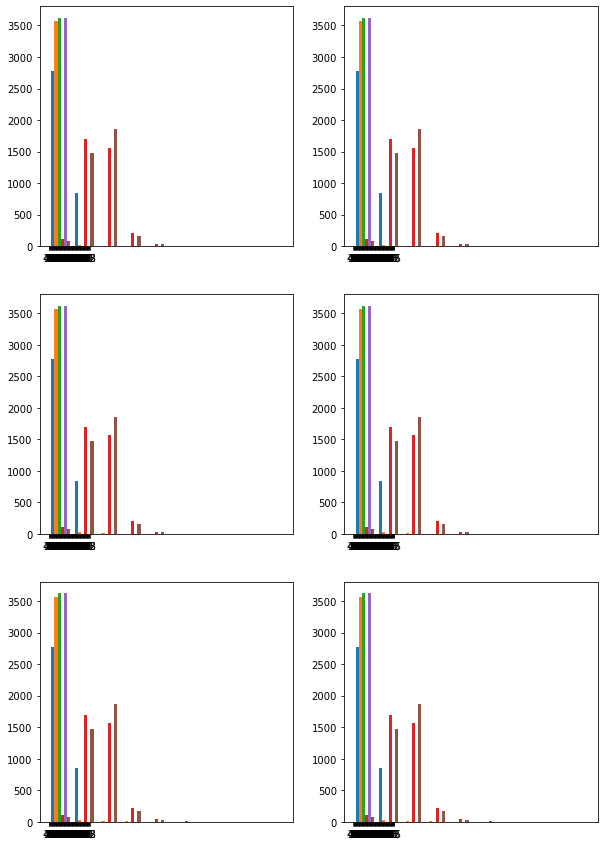

In [269]:
# Given the following columns
columns = ['age','TSH','T3','TT4','T4U','FTI']


# Plot the histogram of each feature with the subplots configuration below
ROWS = 3
COLS = 2
fig, axes = plt.subplots(nrows = ROWS, ncols = COLS, figsize = (10, 15))

# Use a nested for loop to plot for each sub-figure.
# Also add the x label under each figure with the set_xlabel() method
for i in range(ROWS):
    for j in range(COLS):
        # SUPPLY YOUR CODE HERE TO RE-CREATE THE PLOT
        axes[i][j].hist(x=df[columns])
        
        
        
        


#### Everything other than the `TSH` column looks good. Since `TSH` won't give much of variance, so let's drop this column.

In [270]:
df.drop('TSH', axis=1, inplace=True)



#### Let's see how balanced the labels are:

C:\Users\augus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

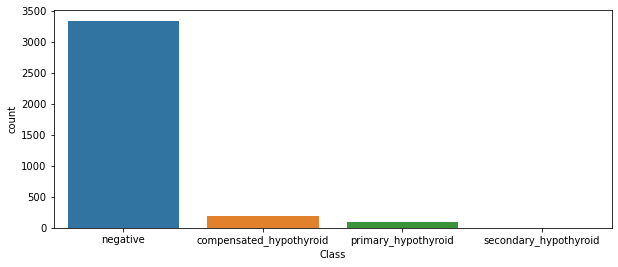

In [271]:
plt.figure(figsize = (10, 4))
sns.countplot(df['Class'])





## Q7: Split the Data

From Q6 above, we notice that our label column `Class` has 4 distinct categories.

#### For the sake of simplicity, let's convert the `negative` labels to a numeric 0, and the rest of the "positive" labels as a numeric 1. 

Hint: you can define a function (or lambda expression) that does the transformation for the `Class` column.

In [272]:
def class_label(cols):    
    if cols =='negative':
        return 0
    else:
        return 1

In [273]:
df['Class'] = df['Class'].apply(class_label)



In [274]:
# Check the categories again after the transformation
df['Class'].value_counts()



0    3341
1     280
Name: Class, dtype: int64

#### Then, split the data into X_train, X_test, y_train, y_test. The test set should contain 20% of the original data, and you should use random seed as 101.

In [275]:
# Import the function
from sklearn.model_selection import train_test_split

In [276]:
X = df.drop('Class', axis=1)

y = df['Class']

In [277]:
# Do the splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [278]:
# Check the shape of X_train and y_train
print(X_train.shape)
print(y_train.shape)

(2896, 24)
(2896,)


## Q8: Data Modeling

#### Let's use Decision Tree to model the data. You need to use "Grid Search" to study the optimal depth of the tree, and the best criterion. Then use the best tree to generate a classification report and a confusion matrix. Use 5-fold cross validation, and random seed as 101 as needed.

#### The parameter grid is given as below:

In [279]:
parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': np.arange(1, 11)}

In [280]:
# Import the necessary classes
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

#### Create a grid search estimator and train the estimator object

In [281]:
dt = DecisionTreeClassifier(random_state=101)
clf = GridSearchCV(cv=5, 
                   estimator=dt,
                   n_jobs=4,
                   param_grid=parameters)
clf.fit(X_train, y_train)







GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=101), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

#### Find the optimal parameter combination

In [282]:
clf.best_params_




{'criterion': 'gini', 'max_depth': 4}

#### Make a predication with the best parameters and generate the classification report and confusion matrix.

In [283]:
final_dt = DecisionTreeClassifier(criterion =  'gini', max_depth= 4, random_state=101)
final_dt.fit(X_train, y_train)
pred = final_dt.predict(X_test)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))





              precision    recall  f1-score   support

           0       0.93      0.99      0.96       655
           1       0.70      0.30      0.42        70

    accuracy                           0.92       725
   macro avg       0.81      0.64      0.69       725
weighted avg       0.91      0.92      0.91       725

[[646   9]
 [ 49  21]]


## Q9: Iterative Study

Looking at the overall F1 score 0.92, it is not bad. However, if we pay close attention to the label 1, the F1 score is only 0.42. Since our goal is to predict whether a person is "positive", we need to improve the F1 score for label 1. 

The issue comes from many aspects: 
+ The dataset is extremely imbalanced in between label 0 and 1.
+ The dataset is not standardized before feeding into the tree model.
+ The data may not be the cleanest and the tree model may not be the best fit. 

#### In this iterative study, we need to improve the F1 score for label 1 with ALL three approaches listed below:
1. Down-sample the majority group (label 0) and up-sample the minority group (label 1) so that both groups will have exactly 1,000 data records. Use "sample without replacement" for down-sampling, and "sample with replacement" for up-sampling;
2. Standardize the dataset before model training;
3. Apply other machine learning techniques including feature selection, dimensionality reduction, hyper-parameter fine tuning and using other models to improve the F1 score. 

In [284]:
from sklearn import preprocessing

In [ ]:
sns.pairplot(df)

In [333]:
# You may want to copy and paste the necessary code 
# from Q2-Q7 into this cell so that you can have a 
# fresh start. 
df2 = df2[['FTI', 'T4U', 'TT4', 'T3']]
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
standard = preprocessing.scale(X_train)
final_dt = DecisionTreeClassifier(criterion =  'gini', max_depth= 4, random_state=101)
final_dt.fit(standard, y_train)
new_pred = final_dt.predict(X_test)



C:\Users\augus\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [334]:
# YOUR MAGIC
print(classification_report(y_test, new_pred))
print(confusion_matrix(y_test, new_pred))





                         precision    recall  f1-score   support

compensated_hypothyroid       0.00      0.00      0.00        47
               negative       0.90      1.00      0.95       655
    primary_hypothyroid       0.00      0.00      0.00        22
  secondary_hypothyroid       0.00      0.00      0.00         1

               accuracy                           0.90       725
              macro avg       0.23      0.25      0.24       725
           weighted avg       0.82      0.90      0.86       725

[[  0  47   0   0]
 [  0 655   0   0]
 [  0  22   0   0]
 [  0   1   0   0]]


C:\Users\augus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\augus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\augus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [335]:
df2 = df2[['FTI', 'T4U', 'TT4', 'T3']]
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
standard = preprocessing.scale(X_train)
final_dt = DecisionTreeClassifier(class_weight='balanced', criterion =  'gini', max_depth= 4, random_state=101)
final_dt.fit(standard, y_train)
new_pred = final_dt.predict(X_test)

C:\Users\augus\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [336]:
print(classification_report(y_test, new_pred))
print(confusion_matrix(y_test, new_pred))


                         precision    recall  f1-score   support

compensated_hypothyroid       0.07      1.00      0.13        47
               negative       0.98      0.06      0.12       655
    primary_hypothyroid       0.00      0.00      0.00        22
  secondary_hypothyroid       0.00      0.00      0.00         1

               accuracy                           0.12       725
              macro avg       0.26      0.27      0.06       725
           weighted avg       0.89      0.12      0.12       725

[[ 47   0   0   0]
 [613  42   0   0]
 [ 22   0   0   0]
 [  0   1   0   0]]


C:\Users\augus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\augus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\augus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
